# Social Network Segmentation Analysis

In this exercise, we will try to identify different groups of teenagers based on their personal preferences using an unsupervised learning model.  
  
Start by importing your libraries, loading the dataset and exploring its variables.  
What features do you find? Do they have the correct datatypes?

In [1]:
#Import your libraries here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
#Load the dataset and explore its variables
df=pd.read_csv('snsdata.csv')
df.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [3]:
#gradyear,gender one-hot-encoding? age round?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 40 columns):
gradyear        30000 non-null int64
gender          27276 non-null object
age             24914 non-null float64
friends         30000 non-null int64
basketball      30000 non-null int64
football        30000 non-null int64
soccer          30000 non-null int64
softball        30000 non-null int64
volleyball      30000 non-null int64
swimming        30000 non-null int64
cheerleading    30000 non-null int64
baseball        30000 non-null int64
tennis          30000 non-null int64
sports          30000 non-null int64
cute            30000 non-null int64
sex             30000 non-null int64
sexy            30000 non-null int64
hot             30000 non-null int64
kissed          30000 non-null int64
dance           30000 non-null int64
band            30000 non-null int64
marching        30000 non-null int64
music           30000 non-null int64
rock            30000 non-null int64


In [4]:
df.describe()

,gradyear,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
count,30000.000000,24914.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,2007.500000,17.993950,30.179467,0.267333,0.252300,0.222767,0.161200,0.143133,0.13440,0.106633,...,0.098933,0.257367,0.353000,0.14850,0.069867,0.051167,0.184100,0.114233,0.087967,0.060433
std,1.118053,7.858054,36.530877,0.804708,0.705357,0.917226,0.739707,0.639943,0.51699,0.514333,...,1.942319,0.695758,0.724391,0.47264,0.346779,0.279555,0.624516,0.436796,0.399125,0.345522
min,2006.000000,3.086000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2006.750000,16.312000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.500000,17.287000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2008.250000,18.259000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2009.000000,106.927000,830.000000,24.000000,15.000000,27.000000,17.000000,14.000000,31.00000,9.000000,...,327.000000,12.000000,11.000000,8.00000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


## 1. Data Wrangling

If you found in the last step that there are variables that need to be dealt with before we can start our analysis, please do it. Comment your code and take us through the steps of your thinking.  

Consider the some of these aspects:  
* Wrong data types
* Null values
* Consistency in categorical data

In [5]:
df_teen=df[(df.age>=13) & (df.age<=20)].copy()
df_teen.dropna(inplace=True)

In [6]:
df_teen.gradyear=df_teen.gradyear.astype('category')
df_teen.gender=df_teen.gender.astype('category')

In [7]:
df_teen.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23602 entries, 0 to 29999
Data columns (total 40 columns):
gradyear        23602 non-null category
gender          23602 non-null category
age             23602 non-null float64
friends         23602 non-null int64
basketball      23602 non-null int64
football        23602 non-null int64
soccer          23602 non-null int64
softball        23602 non-null int64
volleyball      23602 non-null int64
swimming        23602 non-null int64
cheerleading    23602 non-null int64
baseball        23602 non-null int64
tennis          23602 non-null int64
sports          23602 non-null int64
cute            23602 non-null int64
sex             23602 non-null int64
sexy            23602 non-null int64
hot             23602 non-null int64
kissed          23602 non-null int64
dance           23602 non-null int64
band            23602 non-null int64
marching        23602 non-null int64
music           23602 non-null int64
rock            23602 non-null i

## 2. Data Visualization

Now that the data is more or less fixed, plot some charts to understand better how it is composed:  
* Check distribution of variables - do we have outliers? What should we do with them?
* Understand which features are correlated - do they represent the same? Which ones should we keep?
* When we compare two variables, is it possible to see groups in the data?
* Given the dimension of the dataset, would it be useful to perform dimension reduction in some variables? Which ones would you group?

Comment your ideas based on the visualizations you made and other data exploration. What will be your next steps before modeling?

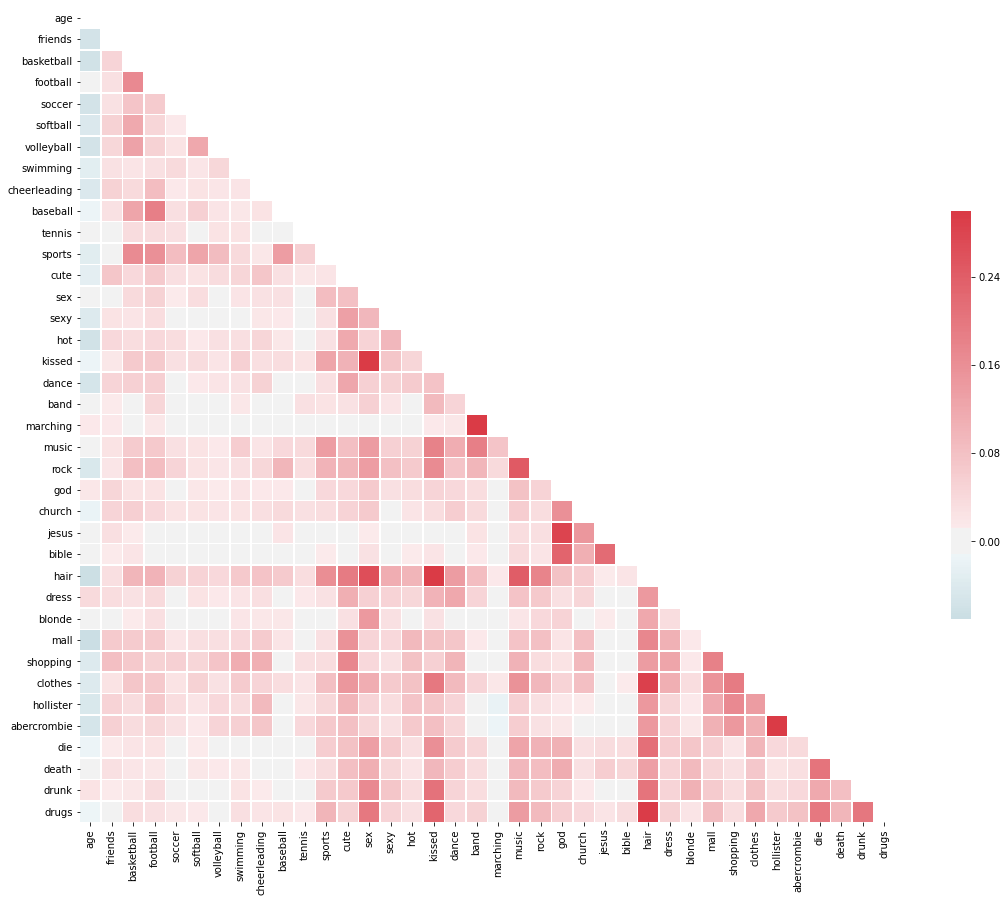

In [8]:
corr=df_teen.corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=np.bool))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.figure(figsize=(20,15))
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},xticklabels=corr.columns.values,yticklabels=corr.columns.values,)

Text(0.5, 0.98, 'Histograms of various features')

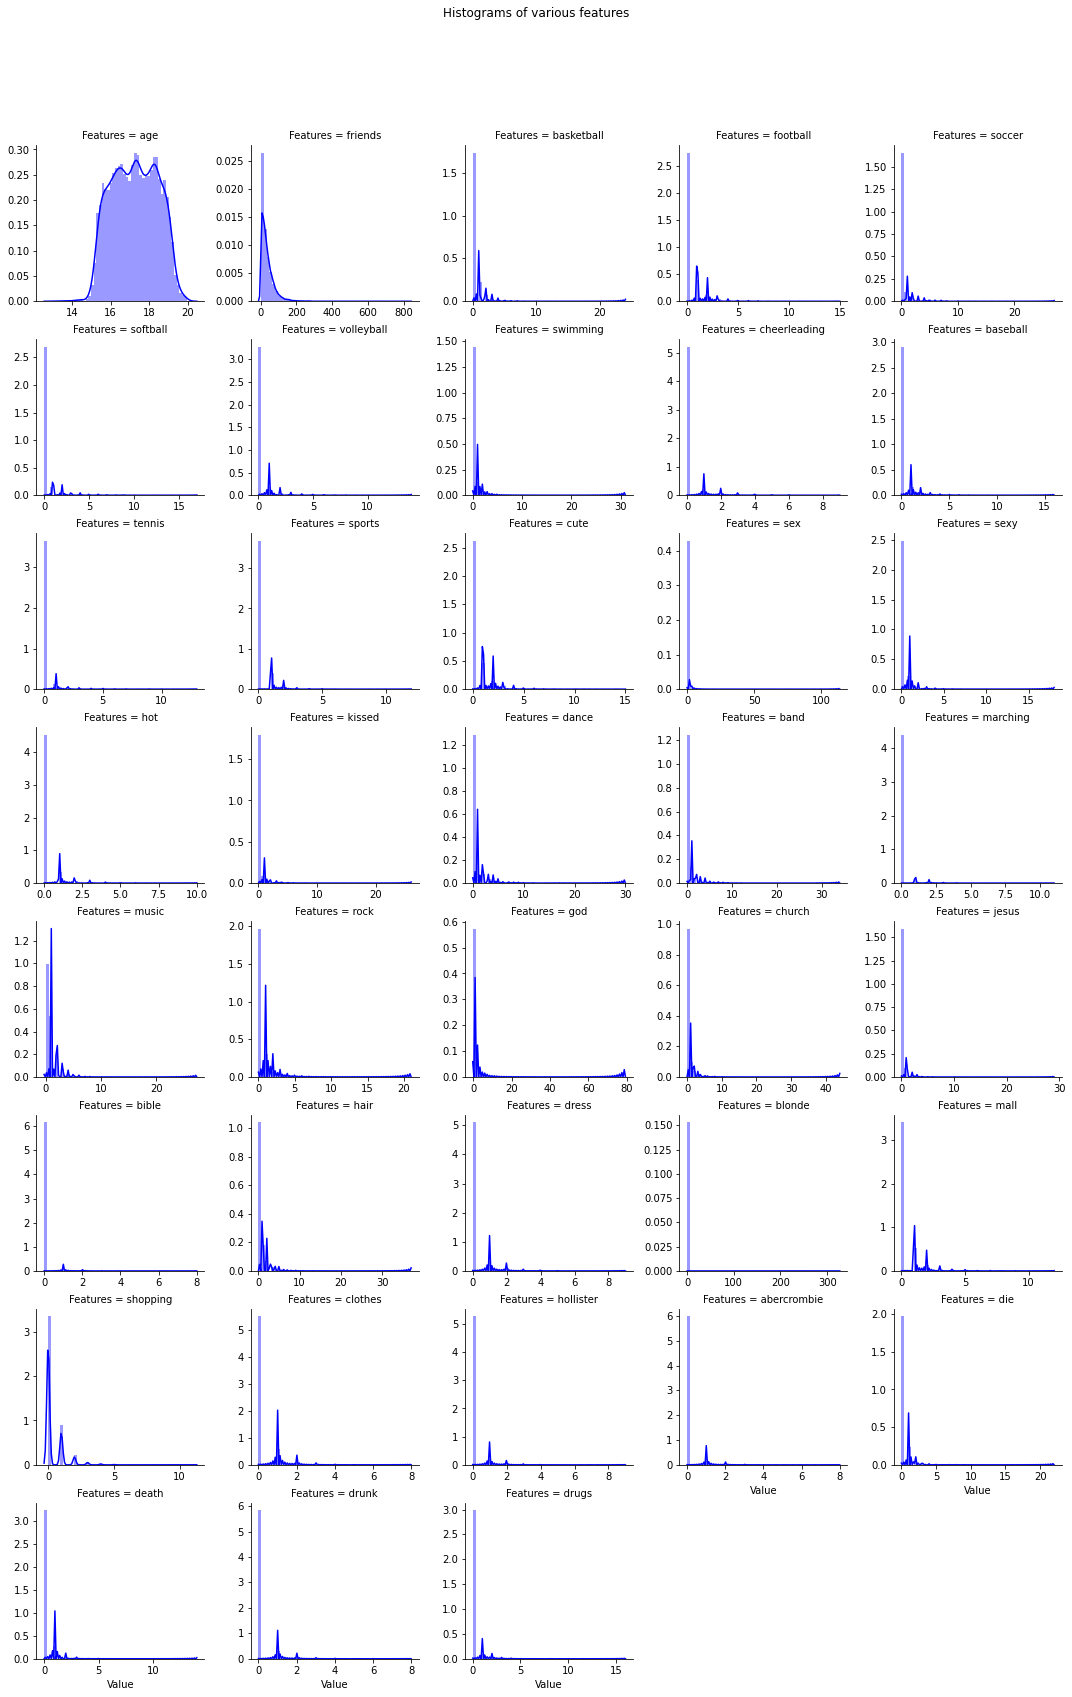

In [9]:
numeric_features= df_teen.select_dtypes(exclude=["category"])
numeric_features = numeric_features.stack().reset_index().rename(columns = {"level_1":"Features",0:"Value"})
g = sns.FacetGrid(data =numeric_features, col="Features",  col_wrap=5, sharex=False, sharey=False)
g = g.map(sns.distplot, "Value", color ='blue')
plt.subplots_adjust(top=0.9)
plt.suptitle("Histograms of various features")

## 3. Feature Engineering

Based on your previous conclusions, perform transformations in your features. Think about:  
* Category Encoding
* Outliers & Standardization
* Dimension Reduction
* Discard features that are less relevant to group the data

Why did you choose each method? Please explain your rationale.

In [10]:
#Outliers
df_small=df_teen.copy()
columnas=['friends','sex','blonde']
cuts=[df_small[col].quantile(.99) for col in columnas]

for i,col in enumerate(columnas):
    df_small=df_small[df_small[col]<cuts[i]]
df_small.reset_index(inplace=True,drop=True)
df_dummies=pd.get_dummies(df_small[['gradyear','gender']],drop_first=True)
df_small.drop(['gradyear','gender'],axis=1,inplace=True)

In [11]:
scaler=MinMaxScaler()

In [12]:
df_stand=pd.DataFrame(scaler.fit_transform(df_small),columns=df_small.columns)

In [13]:
df_final=pd.concat([df_stand,df_dummies],axis=1)

In [14]:
df_final.head()

,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,...,hollister,abercrombie,die,death,drunk,drugs,gradyear_2007,gradyear_2008,gradyear_2009,gender_M
0,0.854621,0.043210,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.000000,0.0,0.0,0,0,0,1
1,0.828645,0.000000,0.0,0.066667,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.000000,0.0,0.0,0,0,0,0
2,0.761768,0.425926,0.0,0.066667,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.071429,0.0,0.0,0,0,0,1
3,0.839265,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.000000,0.0,0.0,0,0,0,0
4,0.847158,0.444444,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.25,0.0,0.0,0.000000,0.0,0.0,0,0,0,0


## 4. Modeling

Now that your data is ready, apply one (or more) unsupervised learning model to find the groups of teens that exist:
* What model did you choose?
* What is the optimal number of clusters?
* Once your clusters are defined, how do you interpret them? - What type of teens there are? What are the differences between them?

In [15]:
from sklearn import metrics
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
#Your code here:
scores = []
inertias = []
values = np.arange(2, 10)
X=df_final
for num_clusters in values:
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(X)
    score = metrics.silhouette_score(X, kmeans.labels_, metric='euclidean', sample_size=len(X))
    print('\nNumber of clusters =', num_clusters)
    print('Silhouette score =', score)
    print('Intertia for current cluster = ', kmeans.inertia_)
    scores.append(score)
    inertias.append(kmeans.inertia_)

C:\Users\Usuario_Asignado\Anaconda3\envs\ironhack_conda\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)



Number of clusters = 2
Silhouette score = 0.31448466357138616
Intertia for current cluster =  15096.734772101849

Number of clusters = 3
Silhouette score = 0.4240229006395448
Intertia for current cluster =  10202.222198960404

Number of clusters = 4
Silhouette score = 0.4681929878898803
Intertia for current cluster =  7239.46656161161

Number of clusters = 5
Silhouette score = 0.48518917326645633
Intertia for current cluster =  5893.872437734816

Number of clusters = 6
Silhouette score = 0.5199942491466392
Intertia for current cluster =  5053.895840907829

Number of clusters = 7
Silhouette score = 0.5542090737439704
Intertia for current cluster =  4260.900626175229

Number of clusters = 8
Silhouette score = 0.5800656475571777
Intertia for current cluster =  3604.9944500099073

Number of clusters = 9
Silhouette score = 0.5897564665672693
Intertia for current cluster =  3302.538230020537


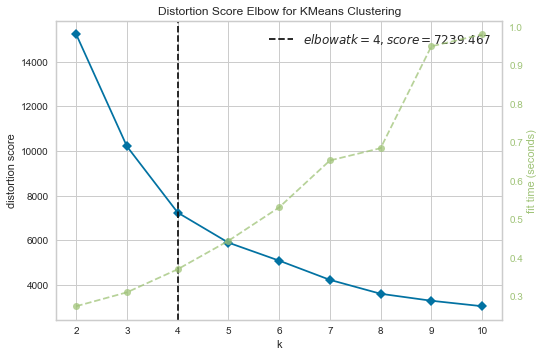

C:\Users\Usuario_Asignado\Anaconda3\envs\ironhack_conda\lib\site-packages\yellowbrick\utils\kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\Usuario_Asignado\Anaconda3\envs\ironhack_conda\lib\site-packages\yellowbrick\cluster\elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


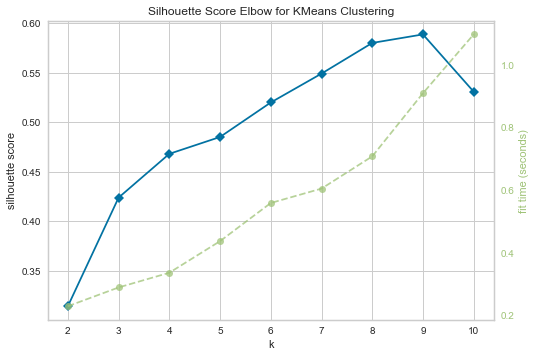

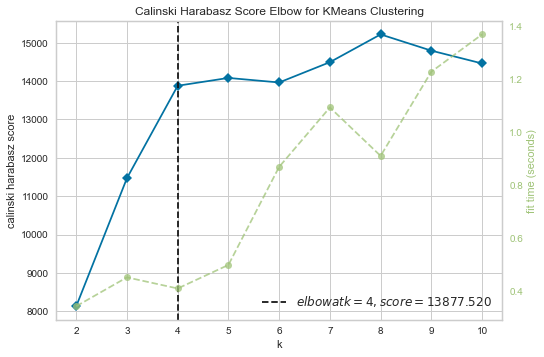

In [16]:
from yellowbrick.cluster import KElbowVisualizer
for metric in ['distortion','silhouette','calinski_harabasz']:
    model=KMeans()
    visualizer=KElbowVisualizer(model,metric=metric)
    visualizer.fit(X)
    visualizer.poof()

In [17]:
kmeans= KMeans(n_clusters=6, random_state=42)
kmeans.fit(X)
X['labels']=kmeans.labels_
X.head()

,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,...,abercrombie,die,death,drunk,drugs,gradyear_2007,gradyear_2008,gradyear_2009,gender_M,labels
0,0.854621,0.043210,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0,0,0,1,5
1,0.828645,0.000000,0.0,0.066667,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0,0,0,0,0
2,0.761768,0.425926,0.0,0.066667,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.071429,0.0,0.0,0,0,0,1,5
3,0.839265,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0,0,0,0,0
4,0.847158,0.444444,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0,0,0,0,0


In [18]:
X.groupby(['labels']).mean().T

labels,0,1,2,3,4,5
age,0.804960,0.669423,0.400972,0.534348,0.549682,0.755038
friends,0.162989,0.188742,0.192004,0.188314,0.144492,0.153366
basketball,0.007743,0.009786,0.014134,0.011437,0.014612,0.011099
football,0.012388,0.013576,0.017473,0.016069,0.034119,0.027177
soccer,0.005317,0.007888,0.011095,0.008662,0.006694,0.007440
softball,0.010018,0.012593,0.012708,0.016098,0.000720,0.000552
volleyball,0.007842,0.011091,0.013836,0.012890,0.001544,0.003101
swimming,0.003845,0.004274,0.004934,0.005282,0.002915,0.002406
cheerleading,0.010286,0.014049,0.013742,0.015659,0.000655,0.000614
baseball,0.003760,0.003172,0.007685,0.004587,0.019401,0.014774


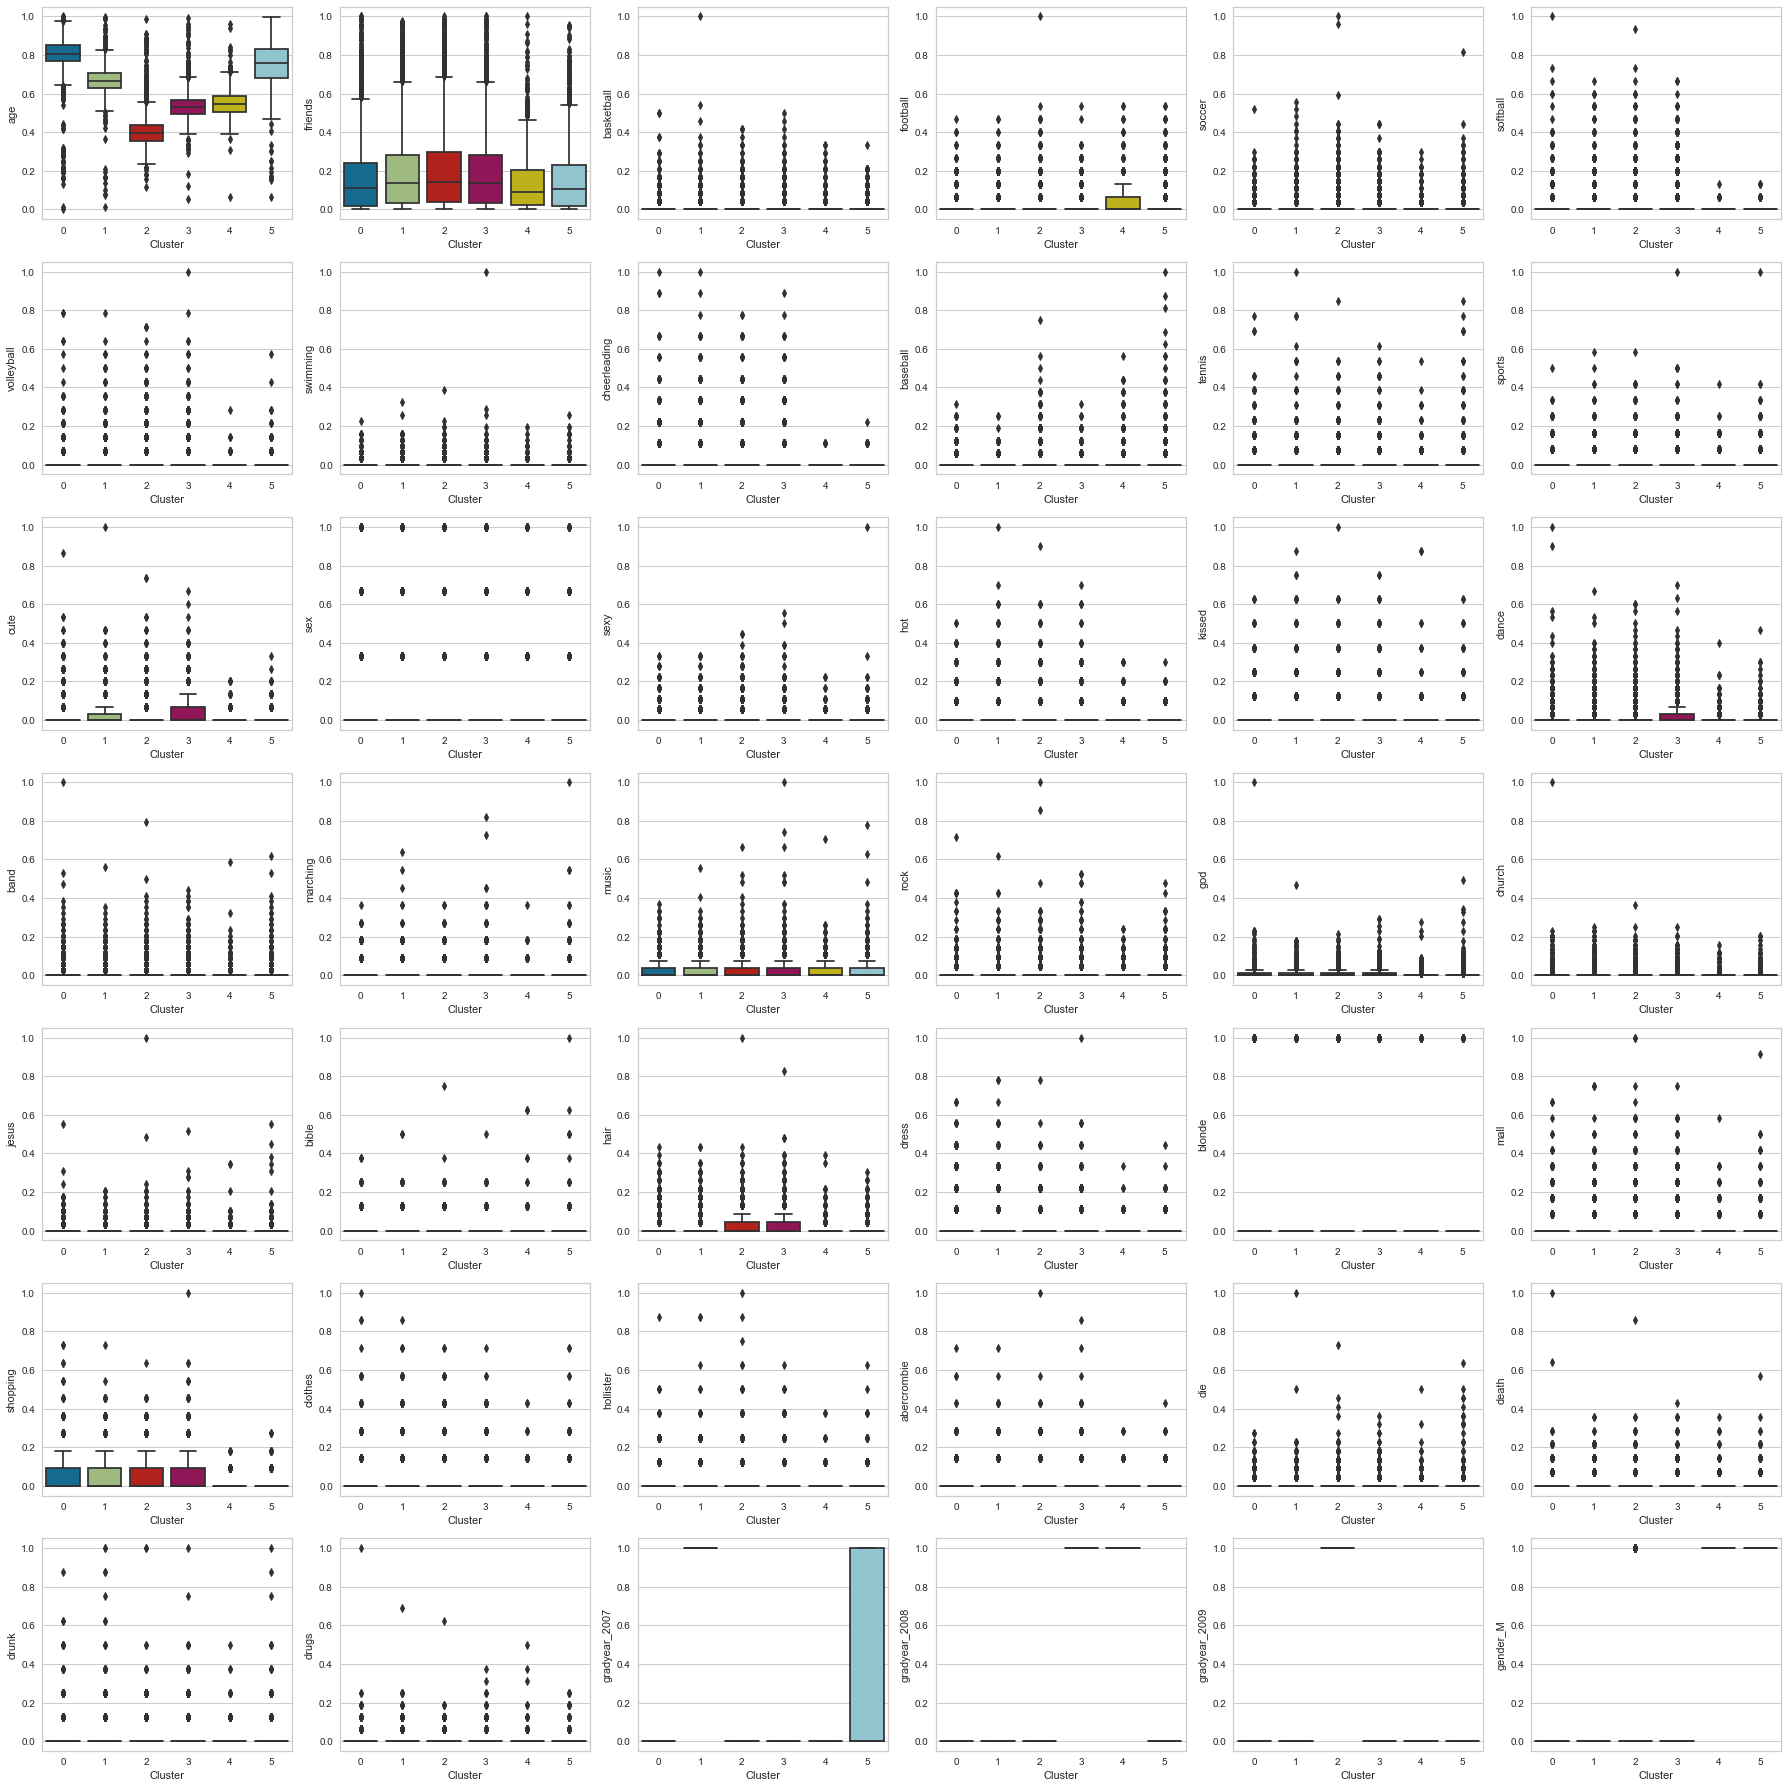

In [19]:
fig, axes = plt.subplots(7,6, figsize=(25,25))
for i,ax in enumerate(axes.flat):
    sns.boxplot(x='labels', y=X.columns[i], data=X,ax=ax)
    ax.set_xlabel('Cluster')
    ax.set_ylabel(X.columns[i])
plt.tight_layout()

In [20]:
X.labels.value_counts()

2    5498
1    4611
3    4605
0    4472
5    2534
4    1018
Name: labels, dtype: int64

In [29]:
#Factor analizer failed